In [1]:
import pyspark
from pyspark import SparkContext
import re
from operator import add

In [2]:
sc=SparkContext('local','pyspark')

In [3]:
file_in=sc.textFile('20150218230000.export.CSV')
print('number of lines in file: %s' % file_in.count())

number of lines in file: 2271


In [6]:
aaa=file_in.map(lambda line:line.split('\t'))

In [16]:
for i in range(0, len(aaa.collect())-1):
    print(len(aaa.collect()[i]))

61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
6

In [17]:
aaa.collect()[0]

[u'410412347',
 u'20140218',
 u'201402',
 u'2014',
 u'2014.1315',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'GOV',
 u'PRESIDENT',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'GOV',
 u'',
 u'',
 u'0',
 u'043',
 u'043',
 u'04',
 u'1',
 u'2.8',
 u'5',
 u'1',
 u'5',
 u'-4.4776119402985',
 u'0',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'4',
 u'Waterkloof, Free State, South Africa',
 u'SF',
 u'SF03',
 u'77359',
 u'-30.3098',
 u'25.2971',
 u'-1299321',
 u'4',
 u'Waterkloof, Free State, South Africa',
 u'SF',
 u'SF03',
 u'77359',
 u'-30.3098',
 u'25.2971',
 u'-1299321',
 u'20150218230000',
 u'http://www.dailymaverick.co.za/article/2015-02-19-sona2015-jamming-state-security-agency-steps-forward-blames-low-ranking-operator/']

In [9]:
chars=file_in.map(lambda s:len(s)).reduce(add)
print('number of characters in file: %s' % chars)

number of characters in file: 887072


In [16]:
words=file_in.flatMap(lambda line:re.split('\W+', line.lower().strip()))

In [12]:
words=words.filter(lambda x:len(x)>3)

In [18]:
words=words.map(lambda w:(w,1))

In [19]:
words=words.reduceByKey(add)

In [20]:
sc.master

u'local'

In [21]:
words=words.map(lambda x:(x[1],x[0])).sortByKey(False)

In [22]:
words.take(20)

[(8100, (u'1', 1)),
 (5279, (u'2015', 1)),
 (4262, (u'0', 1)),
 (4005, (u'4', 1)),
 (3305, (u'2', 1)),
 (2948, (u'united', 1)),
 (2707, (u'states', 1)),
 (2699, (u'us', 1)),
 (2365, (u'3', 1)),
 (2302, (u'20150218', 1)),
 (2271, (u'20150218230000', 1)),
 (2228, (u'1315', 1)),
 (2220, (u'http', 1)),
 (2206, (u'201502', 1)),
 (1861, (u'com', 1)),
 (1564, (u'www', 1)),
 (1405, (u'usa', 1)),
 (1193, (u'5', 1)),
 (950, (u'10', 1)),
 (839, (u'02', 1))]

In [25]:
% matplotlib inline
import matplotlib.pyplot as plt

In [29]:
def histogram(words):
    count=map(lambda x:x[1],words)
    word=map(lambda x:x[0],words)
    plt.barh(range(len(count)),count,color='grey')
    plt.yticks(range(len(count)),word)

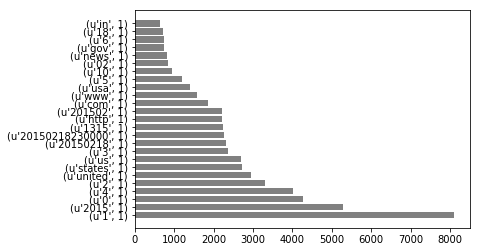

In [30]:
words=words.map(lambda x:(x[1],x[0]))
histogram(words.take(25))